In [1]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline


# Read the image from datasets

In [2]:
img = cv2.imread('C:/SportsPersonClassifier/model/test_images/maria-sharapova-tim-ferriss-interview_s (1).jpg')
img.shape

(1500, 1500, 3)

In [3]:
img1 = cv2.imread('./test_images/maria-sharapova-alexander-gilkes-welcome-first-baby-05 (1).jpg')
img1.shape

(1222, 817, 3)

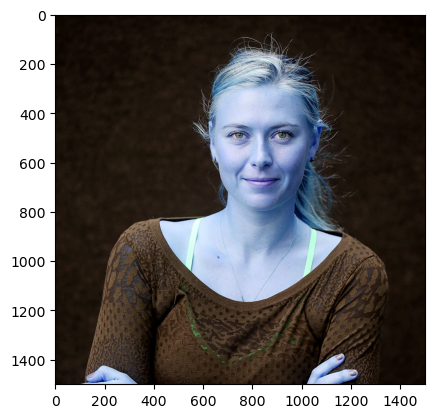

In [4]:
plt.imshow(img)

 convert it into grayscale

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1500, 1500)

In [6]:
gray

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [9, 9, 9, ..., 8, 8, 8],
       [9, 9, 9, ..., 8, 8, 8],
       [9, 9, 9, ..., 8, 8, 8]], dtype=uint8)

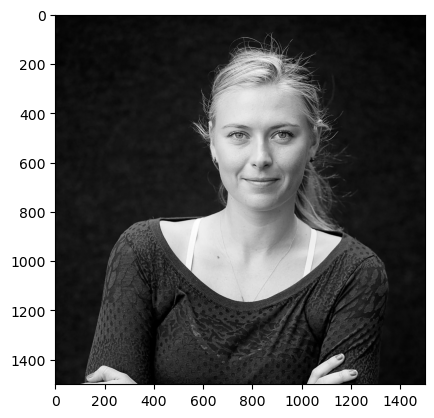

In [7]:
plt.imshow(gray, cmap='gray')

# Haar-cascade Detection in OpenCV

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[592, 301, 478, 478]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(592, 301, 478, 478)

# Face recognition

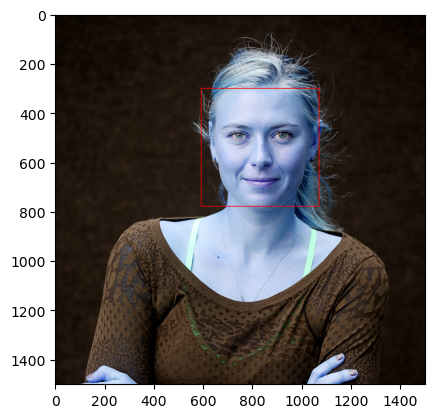

In [10]:
#rectangle around faces##
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  ## 255= red rectangle ##
plt.imshow(face_img)


# Eye Detection

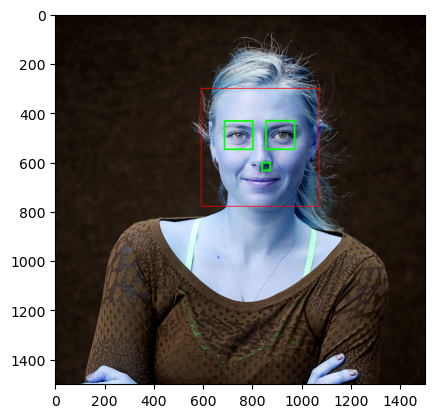

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img1 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
        

plt.figure()
plt.imshow(face_img1, cmap='gray')
plt.show()

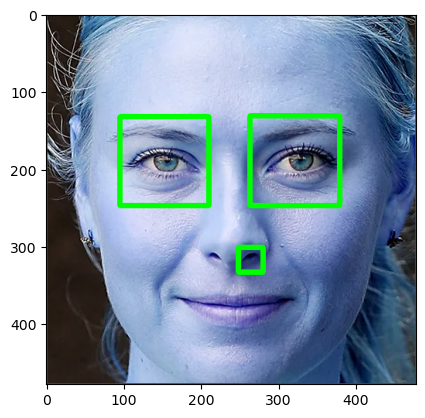

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# Cropped image

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(478, 478, 3)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

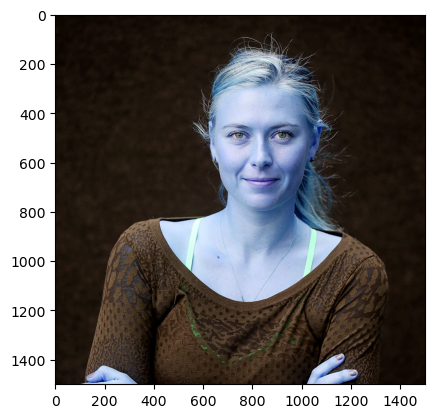

In [15]:
original_img = cv2.imread('C:/SportsPersonClassifier/model/test_images/maria-sharapova-tim-ferriss-interview_s (1).jpg')
plt.imshow(original_img)

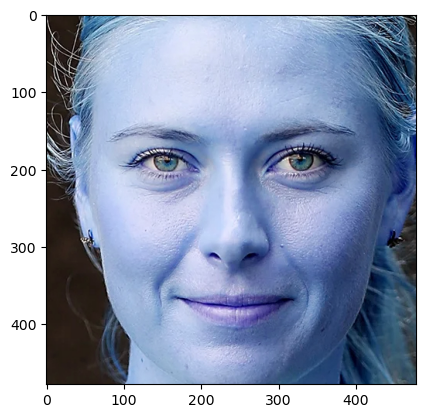

In [16]:
crop_image = get_cropped_image_if_2_eyes('C:/SportsPersonClassifier/model/test_images/maria-sharapova-tim-ferriss-interview_s (1).jpg')
plt.imshow(crop_image)

*Give None result when there is no two detection in the images*

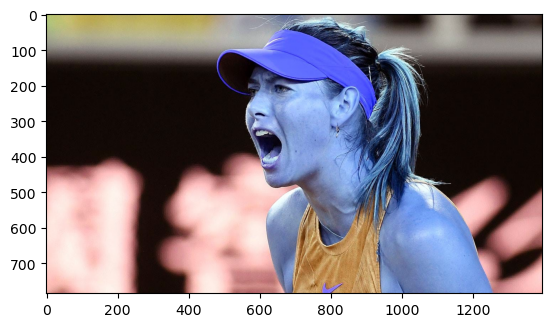

In [17]:
org_img_obstructed = cv2.imread('./test_images/shar.jpg')
plt.imshow(org_img_obstructed)

In [18]:
crp_img_no2_eyes = get_cropped_image_if_2_eyes('./test_images/shar.jpg')
crp_img_no2_eyes

# Giving path to cropped folder

In [19]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

*sub directories are stores in img_dirs with the help of os.scandir fxn*

In [20]:
##sub directories are stores in img_dirs with the help of os.scandir fxn ##

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./datasets/cropped',
 './datasets/maria sharapova',
 './datasets/messi',
 './datasets/novak djokovic',
 './datasets/sania mirza',
 './datasets/virat kohli']

# cropped folder making

In [22]:
## now generate the crop folder in the datasets ##
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

making sub crop folders for each celebrity in cropped folder

In [23]:
# making sub crop folders for each celebrity in cropped folder#
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
maria sharapova
Generating cropped images in folder: ./datasets/cropped/maria sharapova
messi
Generating cropped images in folder: ./datasets/cropped/messi
novak djokovic
Generating cropped images in folder: ./datasets/cropped/novak djokovic
sania mirza
Generating cropped images in folder: ./datasets/cropped/sania mirza
virat kohli
Generating cropped images in folder: ./datasets/cropped/virat kohli


# PyWavelets Transformation

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


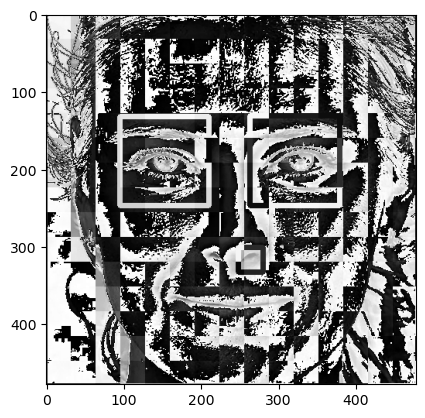

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
celebrity_file_names_dict

{'cropped': [],
 'maria sharapova': ['./datasets/cropped/maria sharapova/maria sharapova1.jpg',
  './datasets/cropped/maria sharapova/maria sharapova2.jpg',
  './datasets/cropped/maria sharapova/maria sharapova3.jpg',
  './datasets/cropped/maria sharapova/maria sharapova4.jpg',
  './datasets/cropped/maria sharapova/maria sharapova5.jpg',
  './datasets/cropped/maria sharapova/maria sharapova6.jpg',
  './datasets/cropped/maria sharapova/maria sharapova7.jpg',
  './datasets/cropped/maria sharapova/maria sharapova8.jpg',
  './datasets/cropped/maria sharapova/maria sharapova9.jpg',
  './datasets/cropped/maria sharapova/maria sharapova10.jpg',
  './datasets/cropped/maria sharapova/maria sharapova11.jpg',
  './datasets/cropped/maria sharapova/maria sharapova12.jpg',
  './datasets/cropped/maria sharapova/maria sharapova13.jpg',
  './datasets/cropped/maria sharapova/maria sharapova14.jpg',
  './datasets/cropped/maria sharapova/maria sharapova15.jpg',
  './datasets/cropped/maria sharapova/maria 

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria sharapova': ['./datasets/cropped/maria sharapova\\maria sharapova1.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova10.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova11.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova12.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova13.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova14.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova15.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova16.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova17.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova18.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova19.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova2.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova20.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova21.jpg',
  './datasets/cropped/maria sharapova\\maria sharapova22.jpg',
  './datasets/cropped/maria sharapova\

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria sharapova': 0,
 'messi': 1,
 'novak djokovic': 2,
 'sania mirza': 3,
 'virat kohli': 4}


**Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now**


In [29]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [30]:

len(X[0])

4096

In [31]:
len(X) #total images#

247

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(247, 4096)

In [33]:
X[0]

array([199., 205., 204., ...,  10., 141.,   0.])

# Data cleaning process is done. Now we are ready to train our model

we will use SVM with rbf kernel tuned with heuristic finetuning

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7903225806451613

In [36]:
len(X_test)

62

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       0.83      0.91      0.87        22
           2       0.75      0.55      0.63        11
           3       0.78      0.70      0.74        10
           4       0.50      0.25      0.33         4

    accuracy                           0.79        62
   macro avg       0.73      0.68      0.69        62
weighted avg       0.78      0.79      0.77        62



## Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

# On Validation set

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.821622,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.702703,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.827027,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

# On test sets

In [42]:
best_estimators['svm'].score(X_test,y_test)

0.7903225806451613

In [43]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8548387096774194

In [44]:
best_clf = best_estimators['svm']

# So Best suitable model for Image Classifier is *SVM*

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  0,  0,  0,  0],
       [ 2, 18,  2,  0,  0],
       [ 3,  0,  8,  0,  0],
       [ 0,  1,  1,  7,  1],
       [ 0,  2,  1,  0,  1]], dtype=int64)

*Heatmap for confusion matrix*

Text(70.72222222222221, 0.5, 'Truth')

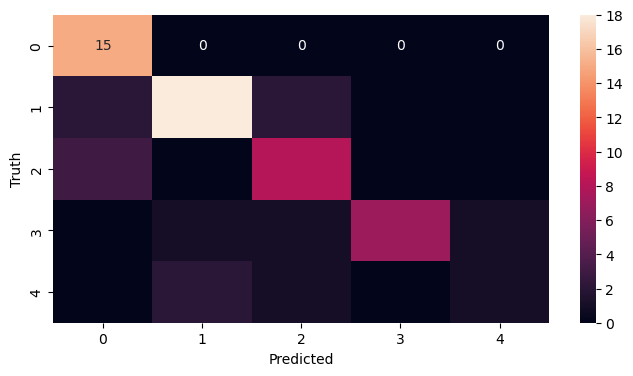

In [67]:
import seaborn as sn
plt.figure(figsize = (8,4))

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
class_dict

{'maria sharapova': 0,
 'messi': 1,
 'novak djokovic': 2,
 'sania mirza': 3,
 'virat kohli': 4}